<a href="https://colab.research.google.com/github/shaly-ct/AI-and-Machine-Learning/blob/main/ReneWine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

### **Business Context**



Renewable energy sources are increasingly crucial in the global energy mix due to environmental concerns. Among these, wind energy is significantly developed, aided by predictive maintenance practices to enhance operational efficiency.
Predictive maintenance uses sensors and analytics to anticipate and prevent equipment failures, reducing maintenance costs by identifying issues before they arise.

### **Objectives**

"ReneWind" is focusing on improving wind turbine operations using machine learning to predict generator failures. They've gathered sensor data, creating a dataset with 40 predictors, 20,000 training observations, and 5,000 test observations.

The aim is to develop classification models to predict failures, minimizing repair and inspection costs. Key metrics include:

* True Positives (TP): Correctly predicted failures, leading to repair costs.
* False Negatives (FN): Undetected failures, incurring replacement costs.
* False Positives (FP): Incorrectly detected failures, resulting in inspection costs.

The cost of repair exceeds replacement, and inspection is less costly than
repair.

A "1" in the target variable indicates a "failure," while "0" indicates "No failure."

### **Data Dictionary**

The dataset for train and test set contains 40 dependant/predictor variable and 1 target variable

# **Importing the necessary libraries**

In [ ]:

# Reinstall the necessary libraries
!pip install tensorflow -q --user
!pip install scikit-learn seaborn matplotlib numpy pandas -q --user

In [ ]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import libraries to set up neural network
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout

#import libraries to split the data
from sklearn.model_selection import train_test_split

#import time
import time

In [ ]:
keras.utils.set_random_seed(812)

# **Loading the data**

In [ ]:
#connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading the input file and storing to a dataframe
df_train= pd.read_csv('/content/drive/MyDrive/Python Course/ReneWind/Train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Python Course/ReneWind/Test.csv')

data_train = df_train.copy()
data_test = df_test.copy()

# **Data Overview**

### Viewing the first and last 5 rows of the dataset

In [ ]:
  data_train.head() #get top 5 rows

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


In [ ]:
data_test.head() #get last 5 rows

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613489,-3.819640,2.202302,1.300420,-1.184929,-4.495964,-1.835817,4.722989,1.206140,-0.341909,...,2.291204,-5.411388,0.870073,0.574479,4.157191,1.428093,-10.511342,0.454664,-1.448363,0
1,0.389608,-0.512341,0.527053,-2.576776,-1.016766,2.235112,-0.441301,-4.405744,-0.332869,1.966794,...,-2.474936,2.493582,0.315165,2.059288,0.683859,-0.485452,5.128350,1.720744,-1.488235,0
2,-0.874861,-0.640632,4.084202,-1.590454,0.525855,-1.957592,-0.695367,1.347309,-1.732348,0.466500,...,-1.318888,-2.997464,0.459664,0.619774,5.631504,1.323512,-1.752154,1.808302,1.675748,0
3,0.238384,1.458607,4.014528,2.534478,1.196987,-3.117330,-0.924035,0.269493,1.322436,0.702345,...,3.517918,-3.074085,-0.284220,0.954576,3.029331,-1.367198,-3.412140,0.906000,-2.450889,0
4,5.828225,2.768260,-1.234530,2.809264,-1.641648,-1.406698,0.568643,0.965043,1.918379,-2.774855,...,1.773841,-1.501573,-2.226702,4.776830,-6.559698,-0.805551,-0.276007,-3.858207,-0.537694,0


In [ ]:
data_test.head() #get top 5 rows

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613489,-3.819640,2.202302,1.300420,-1.184929,-4.495964,-1.835817,4.722989,1.206140,-0.341909,...,2.291204,-5.411388,0.870073,0.574479,4.157191,1.428093,-10.511342,0.454664,-1.448363,0
1,0.389608,-0.512341,0.527053,-2.576776,-1.016766,2.235112,-0.441301,-4.405744,-0.332869,1.966794,...,-2.474936,2.493582,0.315165,2.059288,0.683859,-0.485452,5.128350,1.720744,-1.488235,0
2,-0.874861,-0.640632,4.084202,-1.590454,0.525855,-1.957592,-0.695367,1.347309,-1.732348,0.466500,...,-1.318888,-2.997464,0.459664,0.619774,5.631504,1.323512,-1.752154,1.808302,1.675748,0
3,0.238384,1.458607,4.014528,2.534478,1.196987,-3.117330,-0.924035,0.269493,1.322436,0.702345,...,3.517918,-3.074085,-0.284220,0.954576,3.029331,-1.367198,-3.412140,0.906000,-2.450889,0
4,5.828225,2.768260,-1.234530,2.809264,-1.641648,-1.406698,0.568643,0.965043,1.918379,-2.774855,...,1.773841,-1.501573,-2.226702,4.776830,-6.559698,-0.805551,-0.276007,-3.858207,-0.537694,0


In [ ]:
data_train.tail() #get bottom 5 rows

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
19995,-2.071318,-1.088279,-0.796174,-3.011720,-2.287540,2.807310,0.481428,0.105171,-0.586599,-2.899398,...,-8.273996,5.745013,0.589014,-0.649988,-3.043174,2.216461,0.608723,0.178193,2.927755,1
19996,2.890264,2.483069,5.643919,0.937053,-1.380870,0.412051,-1.593386,-5.762498,2.150096,0.272302,...,-4.159092,1.181466,-0.742412,5.368979,-0.693028,-1.668971,3.659954,0.819863,-1.987265,0
19997,-3.896979,-3.942407,-0.351364,-2.417462,1.107546,-1.527623,-3.519882,2.054792,-0.233996,-0.357687,...,7.112162,1.476080,-3.953710,1.855555,5.029209,2.082588,-6.409304,1.477138,-0.874148,0
19998,-3.187322,-10.051662,5.695955,-4.370053,-5.354758,-1.873044,-3.947210,0.679420,-2.389254,5.456756,...,0.402812,3.163661,3.752095,8.529894,8.450626,0.203958,-7.129918,4.249394,-6.112267,0
19999,-2.686903,1.961187,6.137088,2.600133,2.657241,-4.290882,-2.344267,0.974004,-1.027462,0.497421,...,6.620811,-1.988786,-1.348901,3.951801,5.449706,-0.455411,-2.202056,1.678229,-1.974413,0


### Checking the shape of the dataset.


In [ ]:
data_train.shape #get the number of rows and column

(20000, 41)

In [ ]:
#get the number of rows and column
data_test.shape

(5000, 41)

In [ ]:
#get the summary of a DataFrame
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

In [ ]:
data_test.info() #summary of a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

* All the 40 dependant variable are float and target variable is integer.

### Checking the statistical summary

In [ ]:
#generates descriptive statistics
data_train.describe(include="all")

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
count,19982.000000,19982.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,-0.271996,0.440430,2.484699,-0.083152,-0.053752,-0.995443,-0.879325,-0.548195,-0.016808,-0.012998,...,0.303799,0.049825,-0.462702,2.229620,1.514809,0.011316,-0.344025,0.890653,-0.875630,0.055500
std,3.441625,3.150784,3.388963,3.431595,2.104801,2.040970,1.761626,3.295756,2.160568,2.193201,...,5.500400,3.575285,3.183841,2.937102,3.800860,1.788165,3.948147,1.753054,3.012155,0.228959
min,-11.876451,-12.319951,-10.708139,-15.082052,-8.603361,-10.227147,-7.949681,-15.657561,-8.596313,-9.853957,...,-19.876502,-16.898353,-17.985094,-15.349803,-14.833178,-5.478350,-17.375002,-6.438880,-11.023935,0.000000
25%,-2.737146,-1.640674,0.206860,-2.347660,-1.535607,-2.347238,-2.030926,-2.642665,-1.494973,-1.411212,...,-3.420469,-2.242857,-2.136984,0.336191,-0.943809,-1.255819,-2.987638,-0.272250,-2.940193,0.000000
50%,-0.747917,0.471536,2.255786,-0.135241,-0.101952,-1.000515,-0.917179,-0.389085,-0.067597,0.100973,...,0.052073,-0.066249,-0.255008,2.098633,1.566526,-0.128435,-0.316849,0.919261,-0.920806,0.000000
75%,1.840112,2.543967,4.566165,2.130615,1.340480,0.380330,0.223695,1.722965,1.409203,1.477045,...,3.761722,2.255134,1.436935,4.064358,3.983939,1.175533,2.279399,2.057540,1.119897,0.000000
max,15.493002,13.089269,17.090919,13.236381,8.133797,6.975847,8.006091,11.679495,8.137580,8.108472,...,23.633187,16.692486,14.358213,15.291065,19.329576,7.467006,15.289923,7.759877,10.654265,1.000000


In [ ]:
#generates descriptive statistics
data_test.describe(include="all")

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
count,4995.000000,4994.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,-0.277622,0.397928,2.551787,-0.048943,-0.080120,-1.042138,-0.907922,-0.574592,0.030121,0.018524,...,0.232567,-0.080115,-0.392663,2.211205,1.594845,0.022931,-0.405659,0.938800,-0.932406,0.056400
std,3.466280,3.139562,3.326607,3.413937,2.110870,2.005444,1.769017,3.331911,2.174139,2.145437,...,5.585628,3.538624,3.166101,2.948426,3.774970,1.785320,3.968936,1.716502,2.978193,0.230716
min,-12.381696,-10.716179,-9.237940,-14.682446,-7.711569,-8.924196,-8.124230,-12.252731,-6.785495,-8.170956,...,-17.244168,-14.903781,-14.699725,-12.260591,-12.735567,-5.079070,-15.334533,-5.451050,-10.076234,0.000000
25%,-2.743691,-1.649211,0.314931,-2.292694,-1.615238,-2.368853,-2.054259,-2.642088,-1.455712,-1.353320,...,-3.556267,-2.348121,-2.009604,0.321818,-0.866066,-1.240526,-2.984480,-0.208024,-2.986587,0.000000
50%,-0.764767,0.427369,2.260428,-0.145753,-0.131890,-1.048571,-0.939695,-0.357943,-0.079891,0.166292,...,-0.076694,-0.159713,-0.171745,2.111750,1.702964,-0.110415,-0.381162,0.959152,-1.002764,0.000000
75%,1.831313,2.444486,4.587000,2.166468,1.341197,0.307555,0.212228,1.712896,1.449548,1.511248,...,3.751857,2.099160,1.465402,4.031639,4.104409,1.237522,2.287998,2.130769,1.079738,0.000000
max,13.504352,14.079073,15.314503,12.140157,7.672835,5.067685,7.616182,10.414722,8.850720,6.598728,...,26.539391,13.323517,12.146302,13.489237,17.116122,6.809938,13.064950,7.182237,8.698460,1.000000


* There are 20000 rows in both train and test dataset
* The mean of most of the variables are less than 1
* There are some missing values in V1,V2 in both train and test data

# **Data Preprocessing**

### Checking for missing values

In [ ]:
### Checking for missing values
data_train.isna().sum()

,0
V1,18
V2,18
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


* There are 18 missing values in V1 and V2
* Will treat them using interpolate() method

In [ ]:
#filling the missing values using interpolate in train dataset
data_train['V1'].interpolate(inplace=True)
data_train['V2'].interpolate(inplace=True)

<ipython-input-68-025c74a1ca68>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train['V1'].interpolate(inplace=True)
<ipython-input-68-025c74a1ca68>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [ ]:
data_train.isna().sum() #check for the null values

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


* Missing values are treated using impute method in training dataset

In [ ]:
#filling the missing values using interpolate in test dataset
data_test['V1'].interpolate(inplace=True)
data_test['V2'].interpolate(inplace=True)

<ipython-input-70-2c6bd67d722a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test['V1'].interpolate(inplace=True)
<ipython-input-70-2c6bd67d722a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [ ]:
data_train.isna().sum() #check for null values

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


### Checking for duplicate values

In [ ]:
#Checking for duplicate values in train data
data_train.duplicated().sum()

np.int64(0)

* There are no duplicates in the train dataset

In [ ]:
#Checking for duplicate values in test data
data_test.duplicated().sum()

np.int64(0)

* There are no duplicates in test dataset

# **Exploratory Data Analysis**

### Univariate Analysis

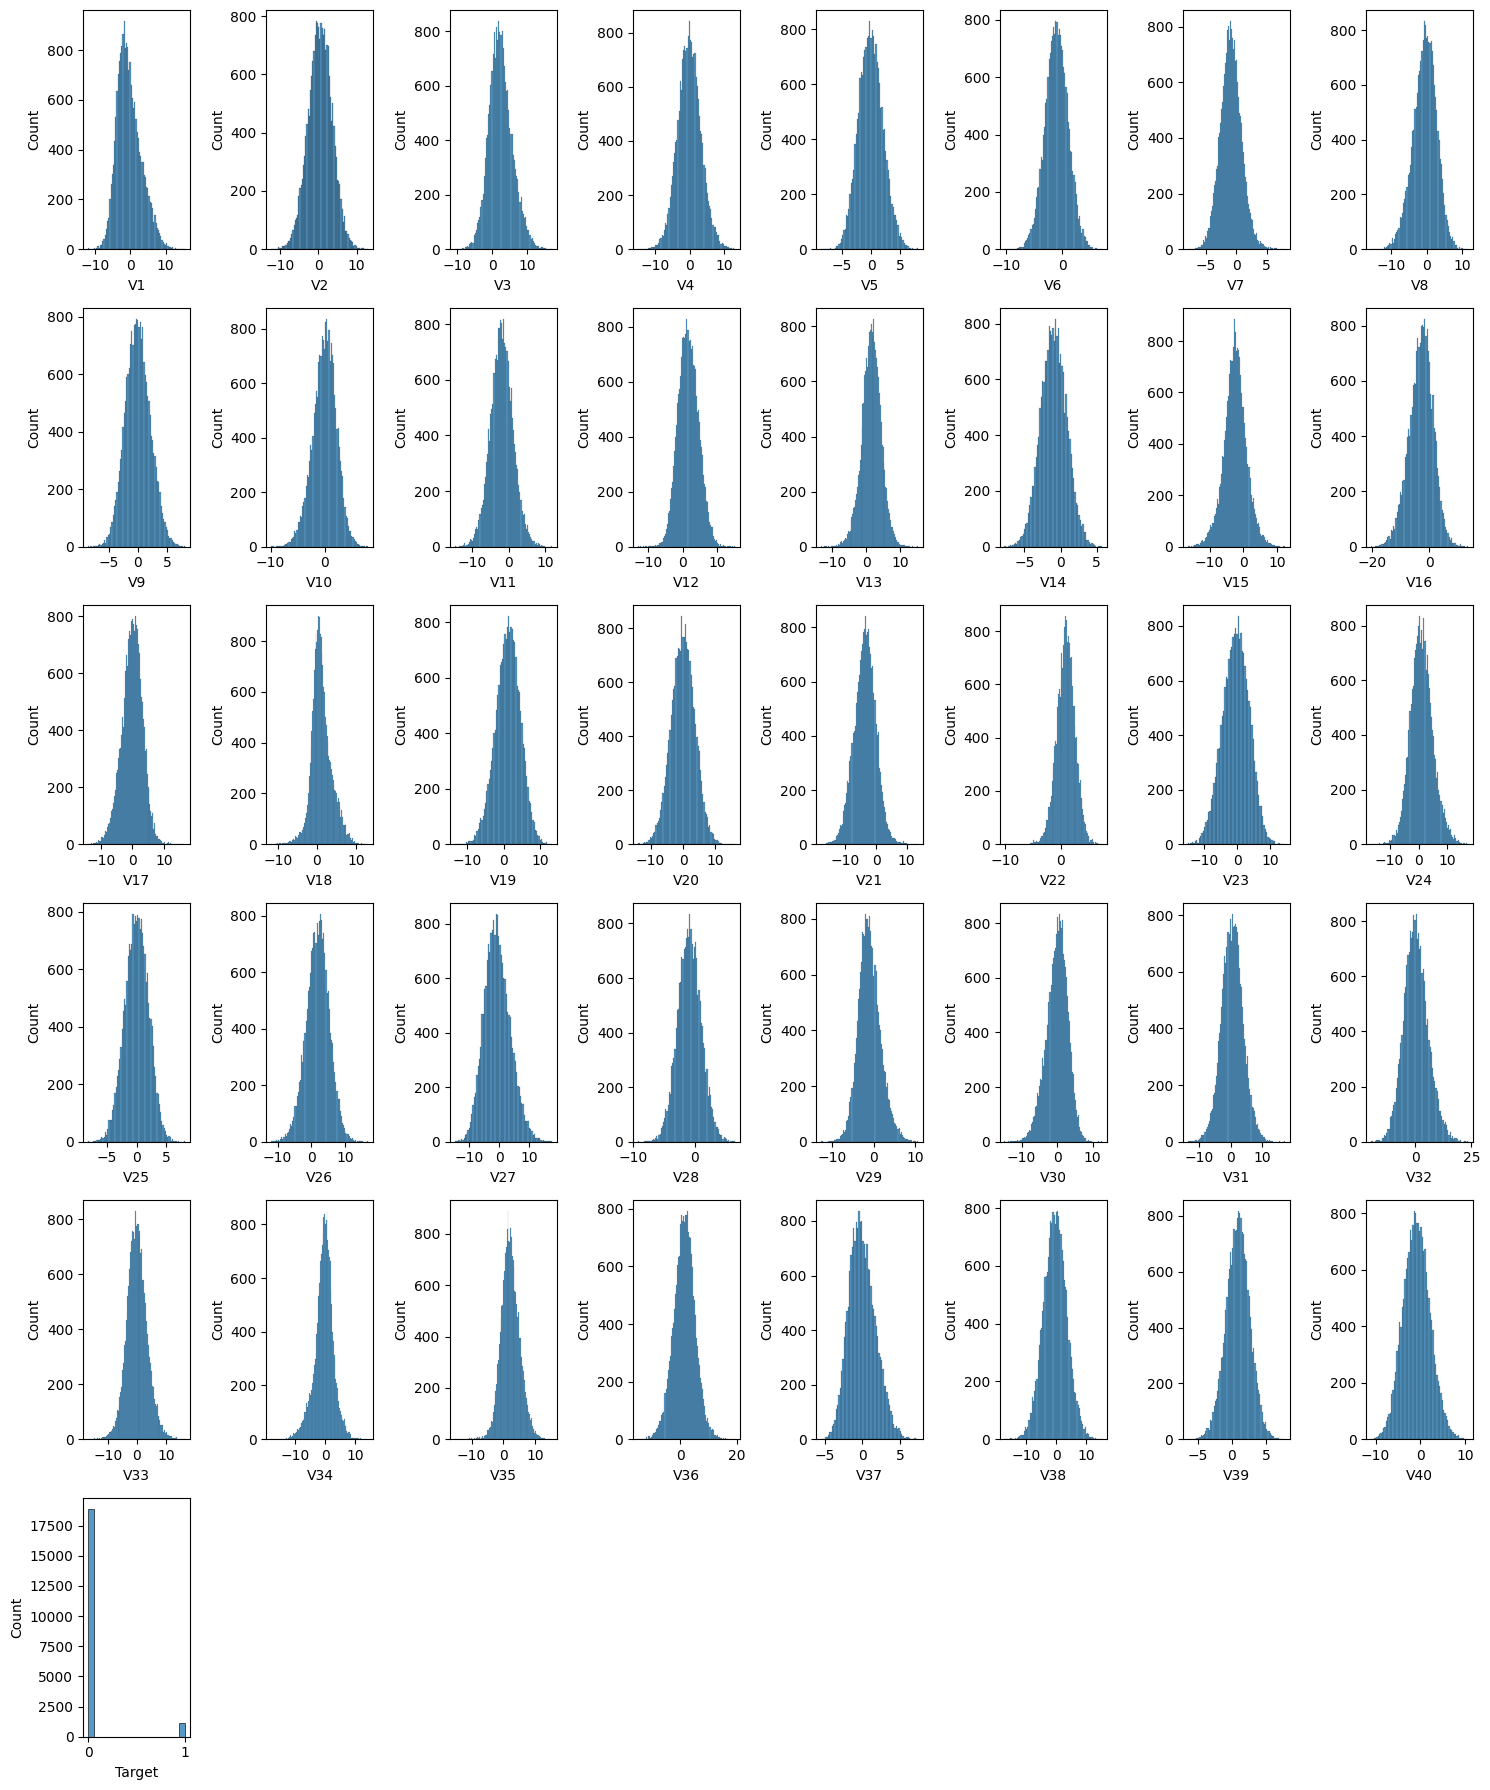

In [ ]:
#Creating histplot
import matplotlib.pyplot as plt
import seaborn as sns
import math

n_cols = data_train.shape[1] # Number of columns in the dataframe
n_rows = math.ceil(n_cols / 8) # Calculate the number of rows needed

plt.figure(figsize=(15, n_rows * 3)) # Adjust figure size based on number of rows
for i,col in enumerate(data_train.columns):
  plt.subplot(n_rows, 8, i + 1) # Adjust subplot index to start from 1
  sns.histplot(data=data_train,x=col)
  plt.tight_layout()
plt.show() # Show the plot

* The variables V to V40 seems to have similar distribution and showing normal distribution.

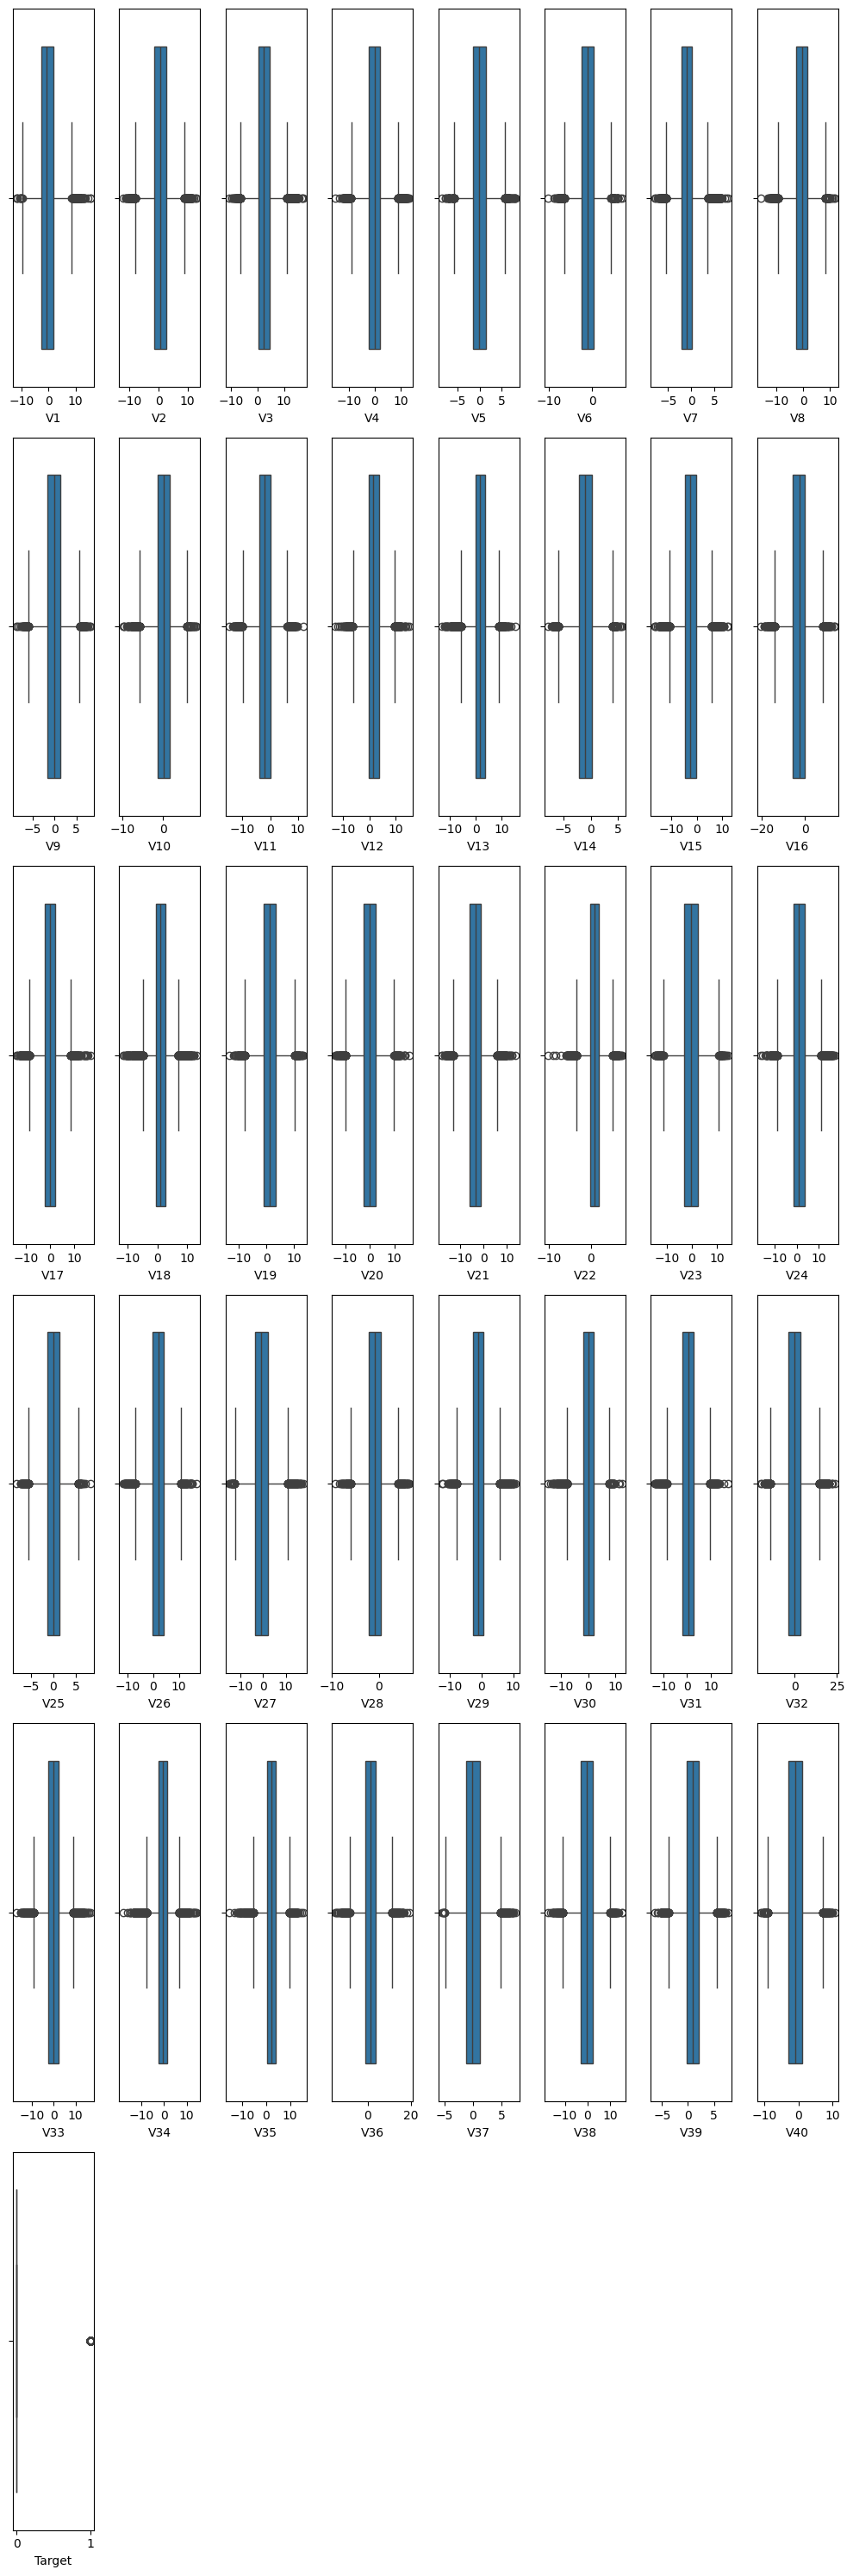

In [ ]:
#Creating boxplot
import matplotlib.pyplot as plt
import seaborn as sns
import math

n_cols = data_train.shape[1] # Number of columns in the dataframe
n_rows = math.ceil(n_cols / 8) # Calculate the number of rows needed

plt.figure(figsize=(10, n_rows * 5)) # Adjust figure size based on number of rows
for i,col in enumerate(data_train.columns):
  plt.subplot(n_rows, 8, i + 1) # Adjust subplot index to start from 1
  sns.boxplot(data=data_train,x=col)
  plt.tight_layout()
plt.show() # Show the plot

* The independant variables V1 to V40 show similar distributions.
* All the independant variables  V1 to V40 have outliers.
* All the independant variables V1 to V40 have normal distribution.

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

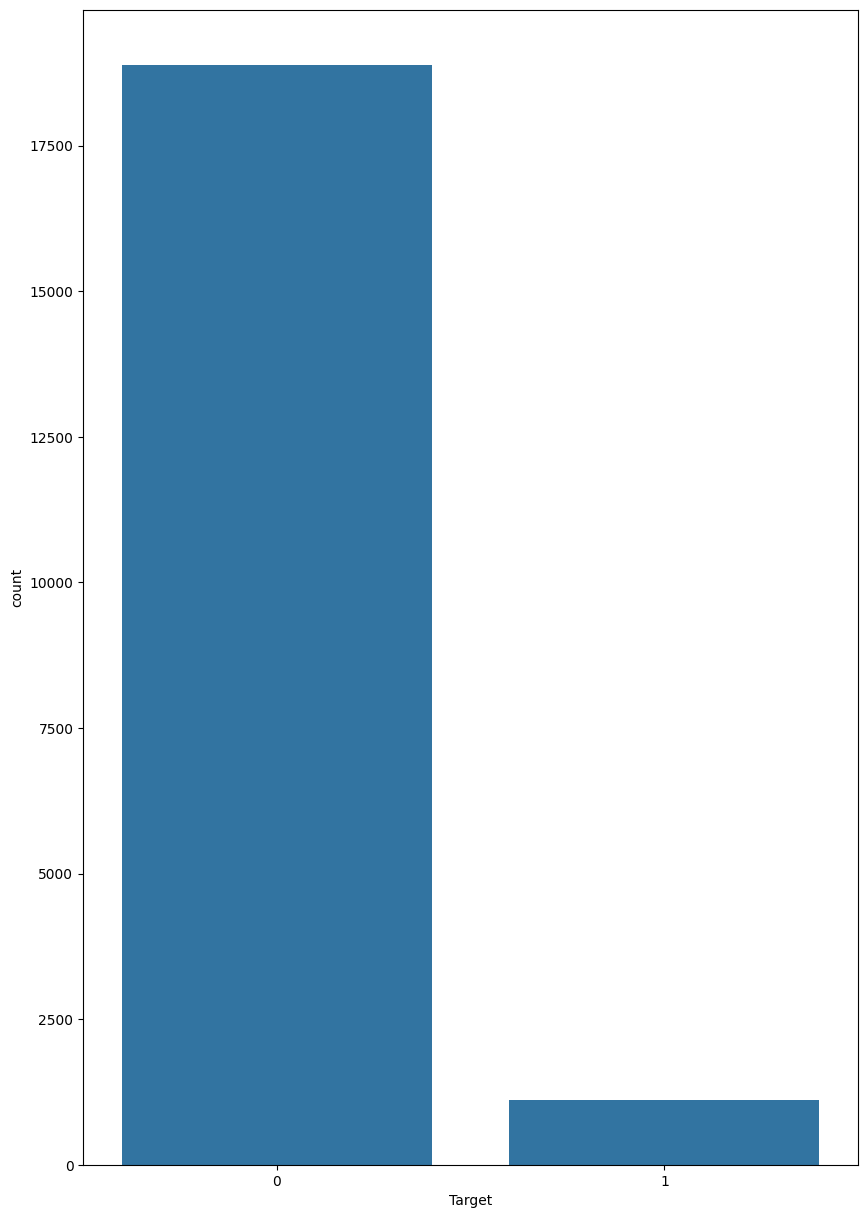

In [ ]:
#count plot for target variable
plt.figure(figsize=(10,15))
sns.countplot(data=data_train,x='Target')
plt.tight_layout

In [ ]:
print(100*data_train['Target'].value_counts(normalize=True)) #checking for %of values

Target
0    94.45
1     5.55
Name: proportion, dtype: float64


* Seems that most of the dataset indicate no faillure. ~95% have no failure
* Very few rows in the dataset have failure. ~5% have failure

### Bivariate Analysis

In [ ]:
# Get a list of all column names
all_columns = data_train.columns.tolist()

# Remove the 'Target' column
feature_columns = [col for col in all_columns if col != 'Target']

print(feature_columns)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40']


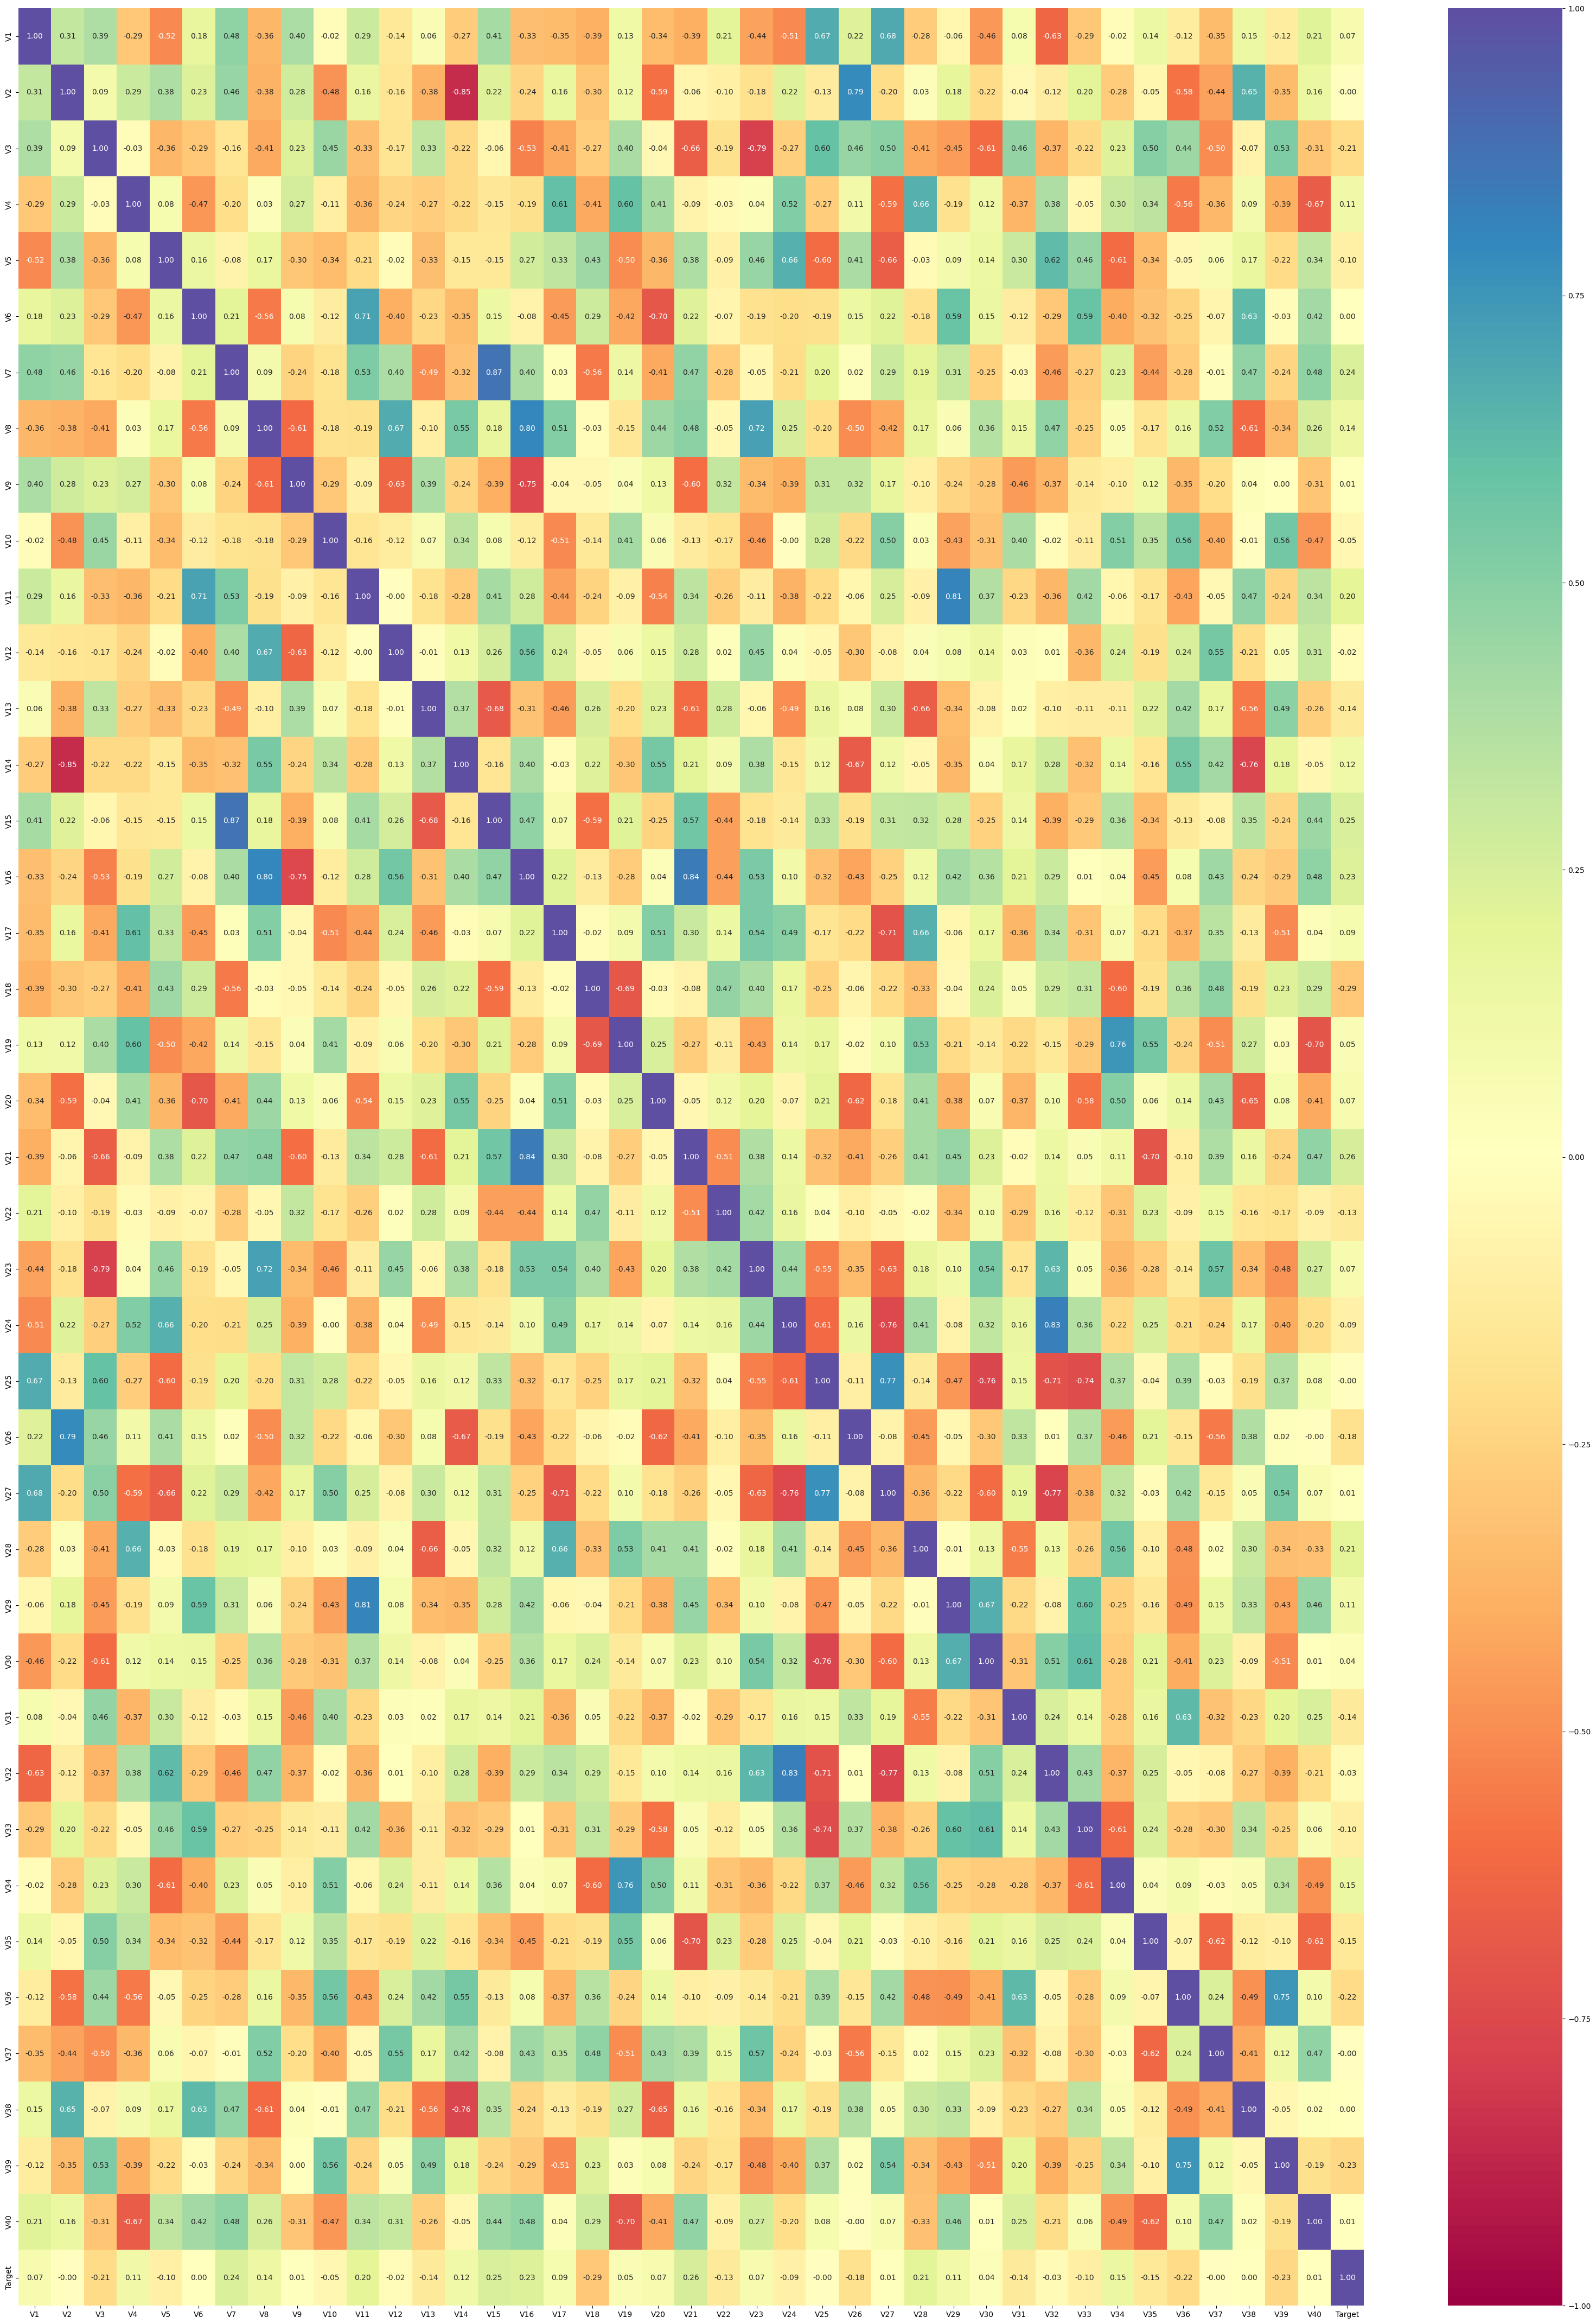

In [ ]:
#plotting heatmap
plt.figure(figsize=(40,55))
sns.heatmap(data_train.corr(),annot=True,vmin=-1,vmax=1,fmt=".2f",cmap='Spectral')
plt.tight_layout;

* V7 and V15 have highest correlation.
* V16 and V21 also have high correlation

In [ ]:
# Scatter plot matrix
plt.figure(figsize=(40, 55))
sns.pairplot(data_train, vars=feature_columns, hue='Target', diag_kind='kde');

* When V35 is less than 0, it is more likely a failure.
* When V21 is greater than 0, it is more likely to be a failure.
* When V7 greater than 0, it is likely a failure.
* When V18 is less than -0.5, it is likely a failure.

### Utility functions

In [ ]:
#creating function to plot accuracy/loss
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [ ]:
#Defining the columns of the dataframe
columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization","train loss","validation loss","train recall","validation recall","time (secs)"]

#Creating a pandas dataframe.
results = pd.DataFrame(columns=columns)

# **Model Building**

In [ ]:
#create X,y for train
x_train=data_train.drop('Target', axis=1)
y_train=data_train['Target']

#create X,y for test
x_test=data_test.drop('Target', axis=1)
y_test=data_test['Target']

In [ ]:
# Splitting the training dataset in the ratio 5:1 for train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1-(5/6), random_state=42,stratify=y_train)

In [ ]:
#clear backed
tf.keras.backend.clear_session()

In [ ]:
batch_size = 15 #set batch size to 15 for all the model
epochs = 5 #set epochs to 5 for all the model
metrics=[tf.keras.metrics.Recall()]

Model 1

In [ ]:
model_1 =Sequential()
model_1.add(Dense(32,activation='relu',input_dim=x_train.shape[1]))
model_1.add(Dense(1,activation='sigmoid'))

* Created model with 1 input layer, 1 hidden layer, 1 output layer.
* Since this is a binary classification, using sigmoid as activation function in output layer.


In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,345 (5.25 KB)

 Trainable params: 1,345 (5.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#optimising NN with SGD
optimiser_sgd = keras.optimizers.SGD()
model_1.compile(loss='binary_crossentropy',optimizer=optimiser_sgd,metrics=metrics)

In [ ]:
#fitting the model
import time
start =time.time()
history = model_1.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_val,y_val))
end=time.time()

Epoch 1/5
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.1708 - recall: 0.3647 - val_loss: 0.0875 - val_recall: 0.6378
Epoch 2/5
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0843 - recall: 0.6672 - val_loss: 0.0759 - val_recall: 0.7135
Epoch 3/5
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0730 - recall: 0.7404 - val_loss: 0.0705 - val_recall: 0.7784
Epoch 4/5
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0668 - recall: 0.7714 - val_loss: 0.0672 - val_recall: 0.8054
Epoch 5/5
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0628 - recall: 0.7853 - val_loss: 0.0648 - val_recall: 0.8108


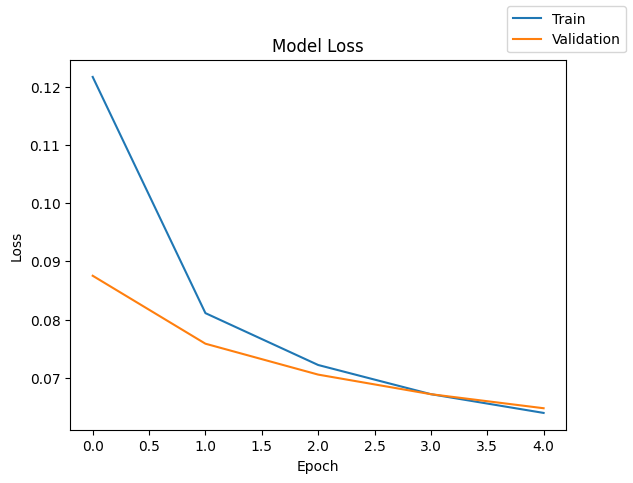

In [ ]:
#plotting loss against epoch for training and validation dataset
plot(history,'loss')

* Since the goal is to minimize false positive ie to reduce the replacement cost recall is used.
* The model shoes steep decrease in loss from epoch 1 to 2. then the loss gradually decreases in training data.
* The model shows gradual decrease in loss from epoch 1 to 4 and then is steady from epoch 4 to 5.

In [ ]:
#adding the results to df
results.loc[0] = [1,[32],["relu"],5,15,"sgd",[0.001, "-"],"xavier","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["recall"][-1],history.history["val_recall"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train recall,validation recall,time (secs)
0,1,[32],[relu],5,15,sgd,"[0.001, -]",xavier,-,0.063955,0.064761,0.791351,0.810811,38.46


* The model's perfomance is better in validation than in training

# **Model Performance Improvement and Final Model Selection**

Model 2 (SGD with momentun)

Adding one more hidden layer

In [ ]:
#clear backed
tf.keras.backend.clear_session()

In [ ]:
model_2 =Sequential()
model_2.add(Dense(32,activation='relu',input_dim=x_train.shape[1]))
model_2.add(Dense(64,activation='relu',input_dim=x_train.shape[1]))
model_2.add(Dense(1,activation='sigmoid'))

In [ ]:
#optimising NN with SGD
mom= 0.9 #adding a momentum
optimiser_sgd = keras.optimizers.SGD(momentum=mom)
model_2.compile(loss='binary_crossentropy',optimizer=optimiser_sgd,metrics=metrics)

In [ ]:
#fitting the model
start =time.time()
history = model_2.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_val,y_val))
end=time.time()

Epoch 1/5
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1227 - recall: 0.7100 - val_loss: 0.0578 - val_recall: 0.8270
Epoch 2/5
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0596 - recall: 0.8229 - val_loss: 0.0514 - val_recall: 0.8486
Epoch 3/5
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0521 - recall: 0.8422 - val_loss: 0.0482 - val_recall: 0.8486
Epoch 4/5
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0476 - recall: 0.8511 - val_loss: 0.0479 - val_recall: 0.8486
Epoch 5/5
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0447 - recall: 0.8691 - val_loss: 0.0475 - val_recall: 0.8703


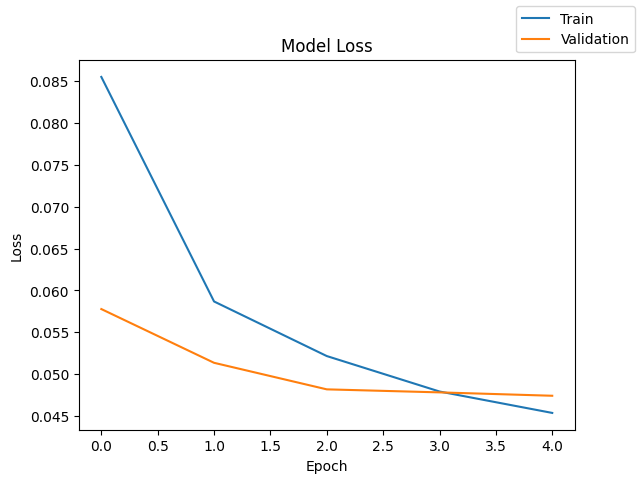

In [ ]:
#plotting loss against epoch for training and validation dataset
plot(history,'loss')

* The loss from epoch 1 to 2 has steeply reduced and gradually moved close to 0 in training data.
* The loss from epoch 1 to 2 has slightly increased and then a steep decrease to epoch 3. Then gradually deceased after epoch 3 in validation dataset

In [ ]:
#adding the results to df
results.loc[1] = [2,str([32,64]),str(["relu","relu"]),5,15,"sgd with momentum",[0.001, 0.9],"xavier","-",history.history["loss"][-1],history.history["val_loss"][-1],history.history["recall"][-1],history.history["val_recall"][-1],round(end-start,2)]

In [ ]:
results #print results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train recall,validation recall,time (secs)
0,1,[32],[relu],5,15,sgd,"[0.001, -]",xavier,-,0.063955,0.064761,0.791351,0.810811,38.46
1,2,"[32, 64]","['relu', 'relu']",5,15,sgd with momentum,"[0.001, 0.9]",xavier,-,0.045405,0.047451,0.868108,0.870270,22.97


* The model perfomance in respect to recall is much better than model 1.
* The validation recall score is slightly better than training

### Calculating Class Weights

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calculate class weights
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)

# Convert class weights to a dictionary
class_weight_dict = dict(zip(classes, class_weights))

print("Class weights:", class_weight_dict)

Class weights: {np.int64(0): np.float64(0.5293818690045106), np.int64(1): np.float64(9.008648648648649)}


Model 3 (with Class Weights)

In [ ]:
# clear backend
tf.keras.backend.clear_session()


In [ ]:

# Define Model 3
model_3 = Sequential()
model_3.add(Dense(32, activation='relu', input_dim=x_train.shape[1]))
model_3.add(Dense(64, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

# Compile Model 3
optimiser_sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_3.compile(loss='binary_crossentropy', optimizer=optimiser_sgd, metrics=metrics)



In [ ]:
# Fit Model 3 with class weights
start = time.time()
history_3 = model_3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val), class_weight=class_weight_dict)
end = time.time()

Epoch 1/5
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4152 - recall: 0.8487 - val_loss: 0.1763 - val_recall: 0.9027
Epoch 2/5
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2165 - recall: 0.8783 - val_loss: 0.1420 - val_recall: 0.9027
Epoch 3/5
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.1884 - recall: 0.8985 - val_loss: 0.1264 - val_recall: 0.9027
Epoch 4/5
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1989 - recall: 0.8958 - val_loss: 0.1216 - val_recall: 0.9135
Epoch 5/5
1112/1112 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.1769 - recall: 0.9016 - val_loss: 0.1079 - val_recall: 0.8973


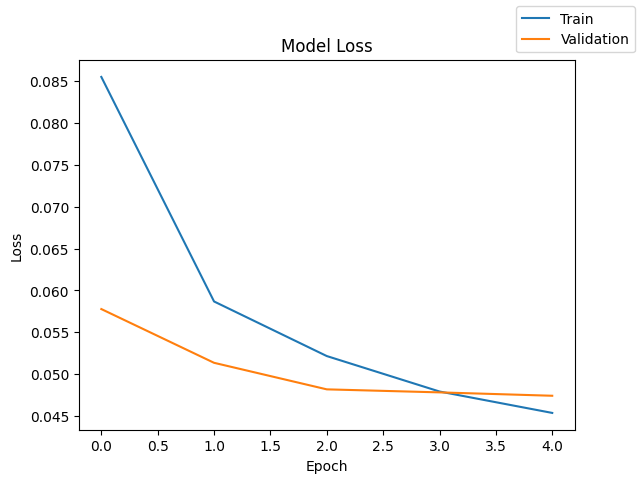

In [ ]:
plot(history,'loss')

* In training dataset, the loss from epoch 1 to 2 has steeply reduced and gradually reducted from epoch 2 till 5 in training data.
* In validation data, the loss from epoch 1 to 2 has slightly decreased and then a slightly increased to epoch 4. Then deceased after epoch 4.

In [ ]:
#adding the results to df
results.loc[2] = [2,str([32,64]),str(["relu","relu"]),5,15,"sgd with momentum",[0.001, 0.9],"xavier","added classweights",history_3.history["loss"][-1],history_3.history["val_loss"][-1],history_3.history["recall"][-1],history_3.history["val_recall"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train recall,validation recall,time (secs)
0,1,[32],[relu],5,15,sgd,"[0.001, -]",xavier,-,0.063955,0.064761,0.791351,0.810811,38.46
1,2,"[32, 64]","['relu', 'relu']",5,15,sgd with momentum,"[0.001, 0.9]",xavier,-,0.045405,0.047451,0.868108,0.870270,22.97
2,2,"[32, 64]","['relu', 'relu']",5,15,sgd with momentum,"[0.001, 0.9]",xavier,added classweights,0.182954,0.107924,0.902703,0.897297,25.95


* The model performance is slightly increased from the previous model in respect to validation dataset.
* The training data recall score is slightly better than the validation recall score.

Model 4 (With dropout)

In [ ]:
# clear backend
tf.keras.backend.clear_session()


In [ ]:

# Define Model 4
model_4 = Sequential()
model_4.add(Dense(32, activation='relu', input_dim=x_train.shape[1]))
model_4.add(Dropout(0.5)) #adding drop-out with 0.5
model_4.add(Dense(64, activation='relu'))
model_4.add(Dropout(0.5)) #adding drop-out with 0.5
model_4.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile Model 4
optimiser_sgd = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_4.compile(loss='binary_crossentropy', optimizer=optimiser_sgd, metrics=metrics)

In [ ]:
#increasing batchsize and epoch
batch_size=20
epochs=15

In [ ]:
# Fit Model 4
start = time.time()
history_4 = model_4.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))
end = time.time()

Epoch 1/15
834/834 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.2159 - recall: 0.5486 - val_loss: 0.0822 - val_recall: 0.6757
Epoch 2/15
834/834 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1036 - recall: 0.5985 - val_loss: 0.0766 - val_recall: 0.6595
Epoch 3/15
834/834 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0936 - recall: 0.6317 - val_loss: 0.0729 - val_recall: 0.6757
Epoch 4/15
834/834 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0887 - recall: 0.6518 - val_loss: 0.0729 - val_recall: 0.6865
Epoch 5/15
834/834 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0875 - recall: 0.6750 - val_loss: 0.0841 - val_recall: 0.6649
Epoch 6/15
834/834 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0808 - recall: 0.6934 - val_loss: 0.0770 - val_recall: 0.6703
Epoch 7/15
834/834 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0817 - recall: 0.6770 - val_loss: 0.0743 - val_recall: 0.6919
Epoch 8/15
834/834 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0770 - recall: 0.6948 - val_loss: 0.0693 - val_recall: 0.7243
Epoch 9/

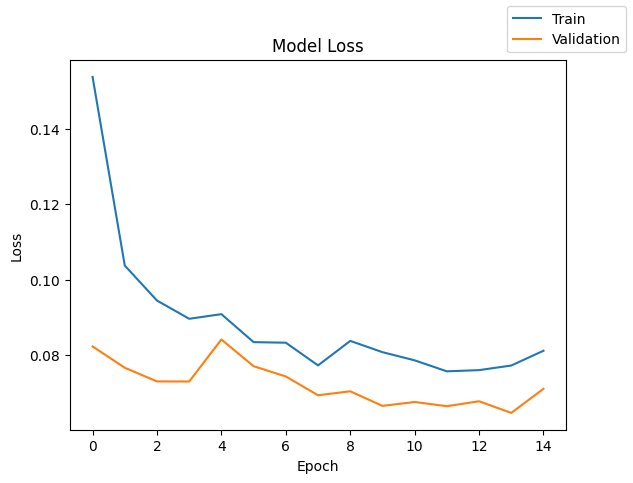

In [ ]:
# Plotting loss
plot(history_4, 'loss')

* in training dataset, the loss increased from epoch 1 to 2 and then decreased steeply at epoch 3. Then there is not much change to loss after epoch 3.
* In validation dataset, the loss almost remains unchanged from epoch 1 till 15.

In [ ]:
# adding the results to df
results.loc[3] = [2,str([32,64]),str(["relu","relu"]),epochs,batch_size,"sgd with momentum","[0.01, 0.9]","xavier","Dropout(0.5)",history_4.history["loss"][-1],history_4.history["val_loss"][-1],history_4.history["recall"][-1],history_4.history["val_recall"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train recall,validation recall,time (secs)
0,1,[32],[relu],5,15,sgd,"[0.001, -]",xavier,-,0.063955,0.064761,0.791351,0.810811,38.46
1,2,"[32, 64]","['relu', 'relu']",5,15,sgd with momentum,"[0.001, 0.9]",xavier,-,0.045405,0.047451,0.868108,0.870270,22.97
2,2,"[32, 64]","['relu', 'relu']",5,15,sgd with momentum,"[0.001, 0.9]",xavier,added classweights,0.182954,0.107924,0.902703,0.897297,25.95
3,2,"[32, 64]","['relu', 'relu']",15,20,sgd with momentum,"[0.01, 0.9]",xavier,Dropout(0.5),0.081104,0.070979,0.705946,0.675676,57.72


* Model perfomance has decreased a lot in bot training and validation dataset.

Model 5 (increasing learning rate and decreasing the momentum

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
834/834 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1738 - recall: 0.4592 - val_loss: 0.0754 - val_recall: 0.6486
Epoch 2/15
834/834 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0925 - recall: 0.6463 - val_loss: 0.0635 - val_recall: 0.7135
Epoch 3/15
834/834 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 0.0887 - recall: 0.6664 - val_loss: 0.0637 - val_recall: 0.6811
Epoch 4/15
834/834 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.0845 - recall: 0.6685 - val_loss: 0.0581 - val_recall: 0.7514
Epoch 5/15
834/834 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0861 - recall: 0.6626 - val_loss: 0.0558 - val_recall: 0.7730
Epoch 6/15
834/834 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0831 - recall: 0.6903 - val_loss: 0.0546 - val_recall: 0.7568
Epoch 7/15
834/834 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0767 - recall: 0.7022 - val_loss: 0.0572 - val_recall: 0.7351
Epoch 8/15
834/834 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.0789 - recall: 0.7112 - val_loss: 0.0555 - val_recall: 0.7676
Epoch 9/

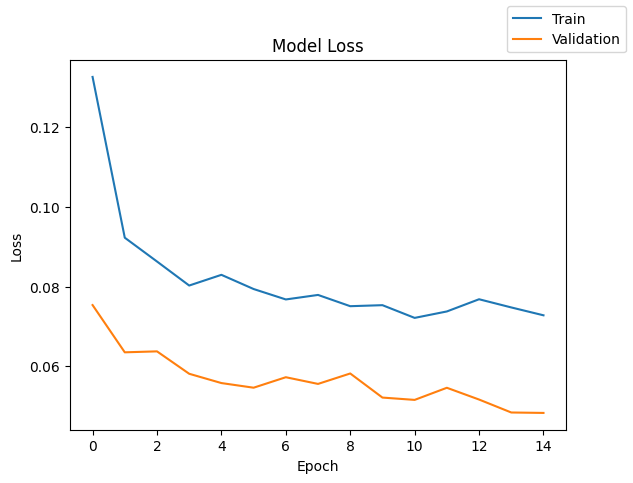

In [ ]:
# clear backend
tf.keras.backend.clear_session()

# Define Model 5
model_5 = Sequential()
model_5.add(Dense(32, activation='relu', input_dim=x_train.shape[1]))
model_5.add(Dropout(0.5)) #adding drop-out with 0.5
model_5.add(Dense(64, activation='tanh'))
model_5.add(Dropout(0.5)) #adding drop-out with 0.5
model_5.add(Dense(1, activation='sigmoid'))

# Compile Model 5
optimiser_sgd = keras.optimizers.SGD(learning_rate=0.05, momentum=0.6)
model_5.compile(loss='binary_crossentropy', optimizer=optimiser_sgd, metrics=metrics)

# Fit Model 5 with increased learning rate and decreased momentum
start = time.time()
history_5 = model_5.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))
end = time.time()

# Plotting loss
plot(history_5, 'loss')

# adding the results to df
results.loc[4] = [2,str([32,64]),str(["relu","tanh"]),epochs,batch_size,"sgd with momentum","[0.05, 0.6]","xavier","Dropout(0.5)",history_5.history["loss"][-1],history_5.history["val_loss"][-1],history_5.history["recall"][-1],history_5.history["val_recall"][-1],round(end-start,2)]

* In training dataset, the loss seems to decrease steeply initially and then gradually decrease.
* In validation dataset, the loss does not show steep changes but gradually decreasing.

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train recall,validation recall,time (secs)
0,1,[32],[relu],5,15,sgd,"[0.001, -]",xavier,-,0.063955,0.064761,0.791351,0.810811,38.46
1,2,"[32, 64]","['relu', 'relu']",5,15,sgd with momentum,"[0.001, 0.9]",xavier,-,0.045405,0.047451,0.868108,0.870270,22.97
2,2,"[32, 64]","['relu', 'relu']",5,15,sgd with momentum,"[0.001, 0.9]",xavier,added classweights,0.182954,0.107924,0.902703,0.897297,25.95
3,2,"[32, 64]","['relu', 'relu']",15,20,sgd with momentum,"[0.01, 0.9]",xavier,Dropout(0.5),0.081104,0.070979,0.705946,0.675676,57.72
4,2,"[32, 64]","['relu', 'tanh']",15,20,sgd with momentum,"[0.05, 0.6]",xavier,Dropout(0.5),0.072783,0.048246,0.734054,0.810811,95.87


* The loss has improved in validation data but recall scores are still low

Model 6 (Oversampling the data using smote)

In [ ]:
!pip install imblearn -q --user

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train,y_train)

print("Shape of original training data:", x_train.shape)
print("Shape of resampled training data:", x_train_resampled.shape)
print("Value counts of original target:", y_train.value_counts())
print("Value counts of resampled target:", y_train_resampled.value_counts())

Shape of original training data: (16666, 40)
Shape of resampled training data: (31482, 40)
Value counts of original target: Target
0    15741
1      925
Name: count, dtype: int64
Value counts of resampled target: Target
0    15741
1    15741
Name: count, dtype: int64


In [ ]:
batch_size = 15 #set batch size to 15
epochs = 5 #set epochs to 5

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 0.3077 - recall: 0.8637 - val_loss: 0.0805 - val_recall: 0.9027
Epoch 2/5
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.2122 - recall: 0.9035 - val_loss: 0.0952 - val_recall: 0.9135
Epoch 3/5
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - loss: 0.1990 - recall: 0.9082 - val_loss: 0.0804 - val_recall: 0.9135
Epoch 4/5
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.1985 - recall: 0.9086 - val_loss: 0.0653 - val_recall: 0.9135
Epoch 5/5
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.1932 - recall: 0.9130 - val_loss: 0.0784 - val_recall: 0.9135


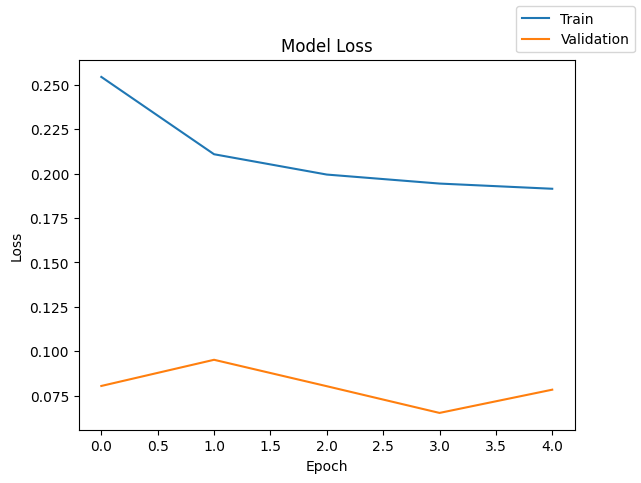

In [ ]:
# clear backend
tf.keras.backend.clear_session()

# Define Model 5
model_6 = Sequential()
model_6.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))
model_6.add(Dropout(0.5)) #adding drop-out with 0.5
model_6.add(Dense(64, activation='tanh'))
model_6.add(Dropout(0.5)) #adding drop-out with 0.5
model_6.add(Dense(1, activation='sigmoid'))

# Compile Model 6
optimiser_sgd = keras.optimizers.SGD(learning_rate=0.05, momentum=0.6)
model_6.compile(loss='binary_crossentropy', optimizer=optimiser_sgd, metrics=metrics)

# Fit Model 6
start = time.time()
history_6 = model_6.fit(x_train_resampled, y_train_resampled, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))
end = time.time()

# Plotting loss
plot(history_6, 'loss')

# adding the results to df
results.loc[5] = [2,str([128,64]),str(["relu","tanh"]),epochs,batch_size,"sgd with momentum","[0.05, 0.6]","xavier","Dropout(0.5)",history_6.history["loss"][-1],history_6.history["val_loss"][-1],history_6.history["recall"][-1],history_6.history["val_recall"][-1],round(end-start,2)]

* In training dataset, the loss has decreased steadily
* In Validation dataset, the loss has been a little bumpy.

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train recall,validation recall,time (secs)
0,1,[32],[relu],5,15,sgd,"[0.001, -]",xavier,-,0.063955,0.064761,0.791351,0.810811,38.46
1,2,"[32, 64]","['relu', 'relu']",5,15,sgd with momentum,"[0.001, 0.9]",xavier,-,0.045405,0.047451,0.868108,0.870270,22.97
2,2,"[32, 64]","['relu', 'relu']",5,15,sgd with momentum,"[0.001, 0.9]",xavier,added classweights,0.182954,0.107924,0.902703,0.897297,25.95
3,2,"[32, 64]","['relu', 'relu']",15,20,sgd with momentum,"[0.01, 0.9]",xavier,Dropout(0.5),0.081104,0.070979,0.705946,0.675676,57.72
4,2,"[32, 64]","['relu', 'tanh']",15,20,sgd with momentum,"[0.05, 0.6]",xavier,Dropout(0.5),0.072783,0.048246,0.734054,0.810811,95.87
5,2,"[128, 64]","['relu', 'tanh']",5,15,sgd with momentum,"[0.05, 0.6]",xavier,Dropout(0.5),0.191502,0.078411,0.912331,0.913514,72.79


* The recall score has got better in training than all the previous models.

Model 7 (With Adam as optimiser)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.5255 - recall: 0.7985 - val_loss: 0.6156 - val_recall: 0.9189
Epoch 2/5
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.5149 - recall: 0.7901 - val_loss: 0.5388 - val_recall: 0.9135
Epoch 3/5
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.4975 - recall: 0.8046 - val_loss: 0.2623 - val_recall: 0.8703
Epoch 4/5
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.5110 - recall: 0.7883 - val_loss: 0.3934 - val_recall: 0.8649
Epoch 5/5
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.4884 - recall: 0.8026 - val_loss: 0.4835 - val_recall: 0.9135


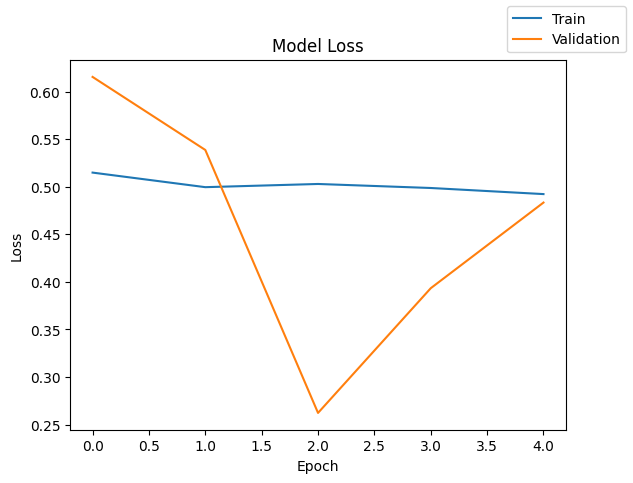

In [ ]:
# clear backend
tf.keras.backend.clear_session()

# Define Model 7
model_7 = Sequential()
model_7.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))
model_7.add(Dropout(0.5)) #adding drop-out with 0.5
model_7.add(Dense(64, activation='tanh'))
model_7.add(Dropout(0.5)) #adding drop-out with 0.5
model_7.add(Dense(1, activation='sigmoid'))

# Compile Model 7
optimiser_adam = keras.optimizers.Adam(learning_rate=0.05)
model_7.compile(loss='binary_crossentropy', optimizer=optimiser_adam, metrics=metrics)

# Fit Model 7
start = time.time()
history_7 = model_7.fit(x_train_resampled, y_train_resampled, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))
end = time.time()

# Plotting loss
plot(history_7, 'loss')

# adding the results to df
results.loc[6] = [2,str([128,64]),str(["relu","tanh"]),epochs,batch_size,"adam",[0.05, "-"],"xavier","Dropout(0.5)",history_7.history["loss"][-1],history_7.history["val_loss"][-1],history_7.history["recall"][-1],history_7.history["val_recall"][-1],round(end-start,2)]

* In training dataset, the loss has almost been almost steady but high.
* In testing dataset, the loss has no jumped from high to low and to high.

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train recall,validation recall,time (secs)
0,1,[32],[relu],5,15,sgd,"[0.001, -]",xavier,-,0.063955,0.064761,0.791351,0.810811,38.46
1,2,"[32, 64]","['relu', 'relu']",5,15,sgd with momentum,"[0.001, 0.9]",xavier,-,0.045405,0.047451,0.868108,0.870270,22.97
2,2,"[32, 64]","['relu', 'relu']",5,15,sgd with momentum,"[0.001, 0.9]",xavier,added classweights,0.182954,0.107924,0.902703,0.897297,25.95
3,2,"[32, 64]","['relu', 'relu']",15,20,sgd with momentum,"[0.01, 0.9]",xavier,Dropout(0.5),0.081104,0.070979,0.705946,0.675676,57.72
4,2,"[32, 64]","['relu', 'tanh']",15,20,sgd with momentum,"[0.05, 0.6]",xavier,Dropout(0.5),0.072783,0.048246,0.734054,0.810811,95.87
5,2,"[128, 64]","['relu', 'tanh']",5,15,sgd with momentum,"[0.05, 0.6]",xavier,Dropout(0.5),0.191502,0.078411,0.912331,0.913514,72.79
6,2,"[128, 64]","['relu', 'tanh']",5,15,adam,"[0.05, -]",xavier,Dropout(0.5),0.492376,0.483464,0.805540,0.913514,58.31


* The recall score in validation dataset is much higher than the training.
* The time taken to complete is also low compared to model 6 which has similar recall score.

Model 8 (With Adam as optimiser, he normal weight initialisation)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 0.7029 - recall: 0.6895 - val_loss: 0.8203 - val_recall: 0.8270
Epoch 2/5
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.7117 - recall: 0.6521 - val_loss: 0.8705 - val_recall: 0.8649
Epoch 3/5
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.7330 - recall: 0.6345 - val_loss: 0.6157 - val_recall: 0.7081
Epoch 4/5
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.7190 - recall: 0.6472 - val_loss: 0.5048 - val_recall: 0.7405
Epoch 5/5
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.6648 - recall: 0.6793 - val_loss: 0.7434 - val_recall: 0.8378


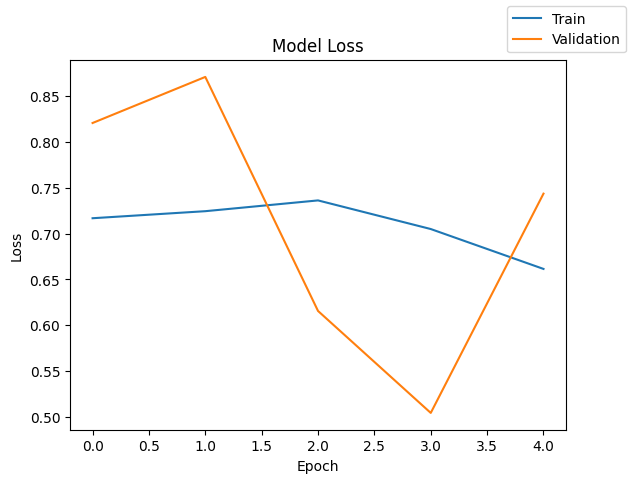

In [ ]:
# clear backend
tf.keras.backend.clear_session()

# Define Model 8
model_8 = Sequential()
model_8.add(Dense(32, activation='relu', input_dim=x_train.shape[1], kernel_initializer='he_normal'))
model_8.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))
model_8.add(Dropout(0.5)) #adding drop-out with 0.5
model_8.add(Dense(64, activation='tanh'))
model_8.add(Dropout(0.5)) #adding drop-out with 0.5
model_8.add(Dense(1, activation='sigmoid'))

# Compile Model 8
optimiser_adam = keras.optimizers.Adam(learning_rate=0.05)
model_8.compile(loss='binary_crossentropy', optimizer=optimiser_adam, metrics=metrics)

# Fit Model 8
start = time.time()
history_8 = model_8.fit(x_train_resampled, y_train_resampled, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))
end = time.time()

# Plotting loss
plot(history_8, 'loss')

# adding the results to df
results.loc[7] = [3,str([32,128,64]),str(["relu","tanh"]),epochs,batch_size,"he_normal",[0.05, "-"],"he_normal","Dropout(0.5)",history_8.history["loss"][-1],history_8.history["val_loss"][-1],history_8.history["recall"][-1],history_8.history["val_recall"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train recall,validation recall,time (secs)
0,1,[32],[relu],5,15,sgd,"[0.001, -]",xavier,-,0.063955,0.064761,0.791351,0.810811,38.46
1,2,"[32, 64]","['relu', 'relu']",5,15,sgd with momentum,"[0.001, 0.9]",xavier,-,0.045405,0.047451,0.868108,0.870270,22.97
2,2,"[32, 64]","['relu', 'relu']",5,15,sgd with momentum,"[0.001, 0.9]",xavier,added classweights,0.182954,0.107924,0.902703,0.897297,25.95
3,2,"[32, 64]","['relu', 'relu']",15,20,sgd with momentum,"[0.01, 0.9]",xavier,Dropout(0.5),0.081104,0.070979,0.705946,0.675676,57.72
4,2,"[32, 64]","['relu', 'tanh']",15,20,sgd with momentum,"[0.05, 0.6]",xavier,Dropout(0.5),0.072783,0.048246,0.734054,0.810811,95.87
5,2,"[128, 64]","['relu', 'tanh']",5,15,sgd with momentum,"[0.05, 0.6]",xavier,Dropout(0.5),0.191502,0.078411,0.912331,0.913514,72.79
6,2,"[128, 64]","['relu', 'tanh']",5,15,adam,"[0.05, -]",xavier,Dropout(0.5),0.492376,0.483464,0.805540,0.913514,58.31
7,3,"[32, 128, 64]","['relu', 'tanh']",5,15,he_normal,"[0.05, -]",he_normal,Dropout(0.5),0.661504,0.743440,0.681024,0.837838,53.01


* recall score in validation has droped than than the previous model.
* training score is less than the validation score. the model has generalised well.


Model 9 (With Adam as optimiser, batche optimisation)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 0.3796 - recall: 0.8387 - val_loss: 0.3190 - val_recall: 0.9135
Epoch 2/5
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.3390 - recall: 0.8563 - val_loss: 0.1952 - val_recall: 0.8595
Epoch 3/5
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.3430 - recall: 0.8434 - val_loss: 0.0980 - val_recall: 0.8703
Epoch 4/5
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - loss: 0.3270 - recall: 0.8509 - val_loss: 0.2885 - val_recall: 0.9027
Epoch 5/5
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.3292 - recall: 0.8512 - val_loss: 0.2029 - val_recall: 0.8973


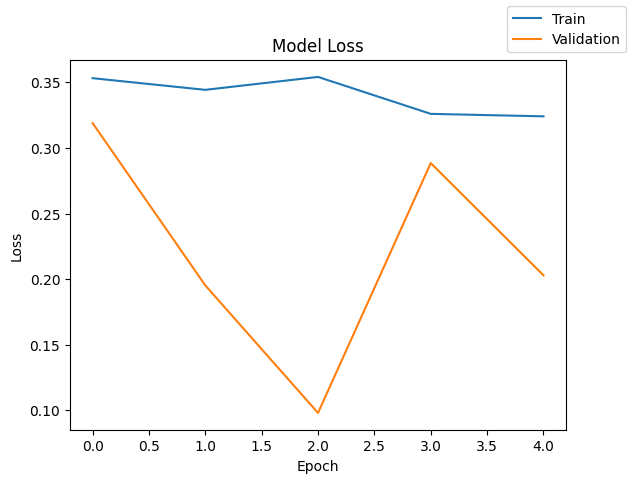

In [ ]:
# clear backend
tf.keras.backend.clear_session()

# Define Model 9
model_9 = Sequential()
model_9.add(Dense(32, activation='relu', input_dim=x_train.shape[1], kernel_initializer='he_normal'))
model_9.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))
model_9.add(BatchNormalization())
model_9.add(Dropout(0.2)) #adding drop-out with 0.2
model_9.add(Dense(64, activation='tanh'))
model_9.add(Dropout(0.2)) #adding drop-out with 0.2
model_9.add(BatchNormalization())
model_9.add(Dense(1, activation='sigmoid'))

# Compile Model 9
optimiser_adam = keras.optimizers.Adam(learning_rate=0.05)
model_9.compile(loss='binary_crossentropy', optimizer=optimiser_adam, metrics=metrics)

# Fit Model 9
start = time.time()
history_9 = model_9.fit(x_train_resampled, y_train_resampled, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))
end = time.time()

# Plotting loss
plot(history_9, 'loss')

# adding the results to df
results.loc[8] = [3,str([32,128,64]),str(["relu","tanh"]),epochs,batch_size,"adam",[0.05, "-"],"he_normal","Dropout(0.2),BatchNormalization",history_9.history["loss"][-1],history_9.history["val_loss"][-1],history_9.history["recall"][-1],history_9.history["val_recall"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train recall,validation recall,time (secs)
0,1,[32],[relu],5,15,sgd,"[0.001, -]",xavier,-,0.063955,0.064761,0.791351,0.810811,38.46
1,2,"[32, 64]","['relu', 'relu']",5,15,sgd with momentum,"[0.001, 0.9]",xavier,-,0.045405,0.047451,0.868108,0.870270,22.97
2,2,"[32, 64]","['relu', 'relu']",5,15,sgd with momentum,"[0.001, 0.9]",xavier,added classweights,0.182954,0.107924,0.902703,0.897297,25.95
3,2,"[32, 64]","['relu', 'relu']",15,20,sgd with momentum,"[0.01, 0.9]",xavier,Dropout(0.5),0.081104,0.070979,0.705946,0.675676,57.72
4,2,"[32, 64]","['relu', 'tanh']",15,20,sgd with momentum,"[0.05, 0.6]",xavier,Dropout(0.5),0.072783,0.048246,0.734054,0.810811,95.87
5,2,"[128, 64]","['relu', 'tanh']",5,15,sgd with momentum,"[0.05, 0.6]",xavier,Dropout(0.5),0.191502,0.078411,0.912331,0.913514,72.79
6,2,"[128, 64]","['relu', 'tanh']",5,15,adam,"[0.05, -]",xavier,Dropout(0.5),0.492376,0.483464,0.805540,0.913514,58.31
7,3,"[32, 128, 64]","['relu', 'tanh']",5,15,he_normal,"[0.05, -]",he_normal,Dropout(0.5),0.661504,0.743440,0.681024,0.837838,53.01
8,3,"[32, 128, 64]","['relu', 'tanh']",5,15,adam,"[0.05, -]",he_normal,"Dropout(0.2),BatchNormalization",0.324116,0.202922,0.861000,0.897297,83.51


* The model has taken a long time to excecute than previous models but the recall scores are not very high.

Model 10 (With Adam as optimiser, batche optimisation, L2 regularizers)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 0.7189 - recall: 0.8082 - val_loss: 0.5409 - val_recall: 0.7135
Epoch 2/5
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.7617 - recall: 0.7934 - val_loss: 0.5966 - val_recall: 0.7676
Epoch 3/5
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 0.8336 - recall: 0.7740 - val_loss: 0.7805 - val_recall: 0.8757
Epoch 4/5
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.8030 - recall: 0.7844 - val_loss: 1.1874 - val_recall: 0.8270
Epoch 5/5
2099/2099 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - loss: 1.1278 - recall: 0.7418 - val_loss: 0.6698 - val_recall: 0.8432


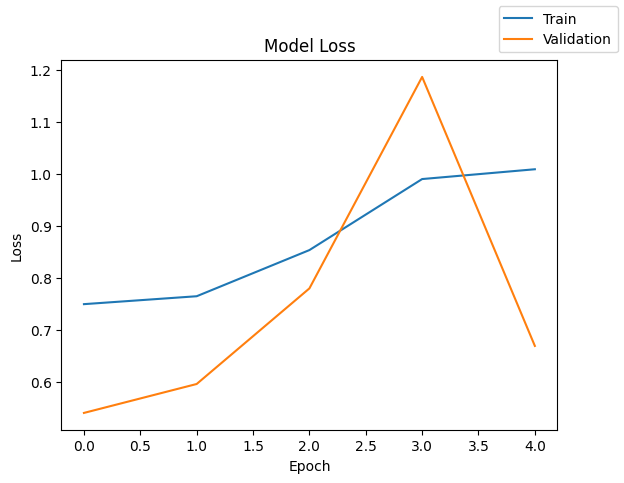

In [ ]:
from keras.regularizers import l2

# clear backend
tf.keras.backend.clear_session()

# Define Model 10
model_10 = Sequential()
model_10.add(Dense(32, activation='relu', input_dim=x_train.shape[1], kernel_initializer='he_normal',kernel_regularizer=l2(0.001)))
model_10.add(Dense(128, activation='relu', input_dim=x_train.shape[1]))
model_10.add(BatchNormalization())
model_10.add(Dropout(0.3)) #adding drop-out with 0.5
model_10.add(Dense(64, activation='tanh'))
model_10.add(Dropout(0.4)) #adding drop-out with 0.5
model_10.add(BatchNormalization())
model_10.add(Dense(1, activation='sigmoid'))

# Compile Model 9
optimiser_adam = keras.optimizers.Adam(learning_rate=0.05)
model_10.compile(loss='binary_crossentropy', optimizer=optimiser_adam, metrics=metrics)

# Fit Model 9
start = time.time()
history_10 = model_10.fit(x_train_resampled, y_train_resampled, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))
end = time.time()

# Plotting loss
plot(history_10, 'loss')

# adding the results to df
results.loc[9] = [3,str([32,128,64]),str(["relu","tanh"]),epochs,batch_size,"adam",[0.05, "-"],"he_normal","Dropout(0.3),BatchNormalization,L2",history_10.history["loss"][-1],history_10.history["val_loss"][-1],history_10.history["recall"][-1],history_10.history["val_recall"][-1],round(end-start,2)]

In [ ]:
results

,# hidden layers,# neurons - hidden layer,activation function - hidden layer,# epochs,batch size,optimizer,"learning rate, momentum",weight initializer,regularization,train loss,validation loss,train recall,validation recall,time (secs)
0,1,[32],[relu],5,15,sgd,"[0.001, -]",xavier,-,0.063955,0.064761,0.791351,0.810811,38.46
1,2,"[32, 64]","['relu', 'relu']",5,15,sgd with momentum,"[0.001, 0.9]",xavier,-,0.045405,0.047451,0.868108,0.870270,22.97
2,2,"[32, 64]","['relu', 'relu']",5,15,sgd with momentum,"[0.001, 0.9]",xavier,added classweights,0.182954,0.107924,0.902703,0.897297,25.95
3,2,"[32, 64]","['relu', 'relu']",15,20,sgd with momentum,"[0.01, 0.9]",xavier,Dropout(0.5),0.081104,0.070979,0.705946,0.675676,57.72
4,2,"[32, 64]","['relu', 'tanh']",15,20,sgd with momentum,"[0.05, 0.6]",xavier,Dropout(0.5),0.072783,0.048246,0.734054,0.810811,95.87
5,2,"[128, 64]","['relu', 'tanh']",5,15,sgd with momentum,"[0.05, 0.6]",xavier,Dropout(0.5),0.191502,0.078411,0.912331,0.913514,72.79
6,2,"[128, 64]","['relu', 'tanh']",5,15,adam,"[0.05, -]",xavier,Dropout(0.5),0.492376,0.483464,0.805540,0.913514,58.31
7,3,"[32, 128, 64]","['relu', 'tanh']",5,15,he_normal,"[0.05, -]",he_normal,Dropout(0.5),0.661504,0.743440,0.681024,0.837838,53.01
8,3,"[32, 128, 64]","['relu', 'tanh']",5,15,adam,"[0.05, -]",he_normal,"Dropout(0.2),BatchNormalization",0.324116,0.202922,0.861000,0.897297,83.51
9,3,"[32, 128, 64]","['relu', 'tanh']",5,15,adam,"[0.05, -]",he_normal,"Dropout(0.3),BatchNormalization,L2",1.009773,0.669819,0.759164,0.843243,81.93


* The model has performed well in validation than the training. But still not the best model

# **Model Performance Comparison and Final Model Selection**

Based on the 10 models created,
* Model 5 and model 6 have similar scores in validation and highest recall score of the 10 models.
* Model 5 has taken 72secs to run and model 6 has taken 58 secs.
* Model 6 runs quickly giving the same result.
* Model 5 has ~91 recall score in both training and validation.
* Considering the recall score and time taken to run the model, Model 6 seems to be the best model.

Let's run the test data for model 6 and find the validation score

In [ ]:
# Evaluate Model 6 on the test data
loss, recall = model_6.evaluate(x_test, y_test, verbose=0)

print(f"Recall on test data for Model 6: {recall}")

Recall on test data for Model 6: 0.8758864998817444


In [ ]:
# Evaluate Model 6 on the test data
loss, recall = model_5.evaluate(x_test, y_test, verbose=0)

print(f"Recall on test data for Model 5: {recall}")

Recall on test data for Model 5: 0.783687949180603


* Model 6 has a recall score of 87.58 in testing dataset.
* Model 5 has a recall score of 78.36 in testing dataset

# **Actionable Insights & Recommendations**

####Actionable Insights:

* Model 6, which utilizes SMOTE for oversampling the minority class (failures), a neural network with two hidden layers, dropout regularization, and the SGD optimizer with momentum, has demonstrated the best performance in identifying potential generator failures.
* The high recall score of Model 6 suggests that it can significantly reduce the number of undetected failures (False Negatives), which are associated with the most expensive outcome (replacement costs).

####Recommendations for the Business:

* Integrate Model 6 into ReneWind's predictive maintenance system. This model can help prioritize inspections and maintenance activities for turbines that are at high risk of failure.
* Since the cost of replacement is higher than repair and inspection, prioritize acting on the predictions from Model 6 that have a high probability of being a failure (high confidence scores). This will help minimize the most significant costs.
* Continuously monitor the performance of Model 6 with new data. Wind turbine operating conditions and sensor data patterns can change over time, so regular retraining of the model with updated data is crucial to maintain its accuracy and effectiveness.
* While minimizing false negatives is critical due to high replacement costs, analyze the instances where the model predicts a failure but none occurs (False Positives). Understanding the characteristics of these instances can help refine the model or the inspection process to reduce unnecessary inspection costs.
* Conduct a detailed cost-benefit analysis of implementing the predictive maintenance system with Model 6. Quantify the savings from reduced replacement costs and compare them against the costs of implementing and maintaining the system, including inspection and repair costs.
* Although not explicitly performed in the notebook, consider exploring feature importance for Model 6. Identifying which sensor readings or variables are most influential in predicting failures can provide valuable insights into the root causes of generator issues and inform other maintenance strategies.